# Read and use the already existing MLP

Import all necessary packages:

In [84]:
# Jupyter packagesb
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Common packages, you know them from before 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import math
import copy
from typing import *
import json
import string
import os
import pickle
# Setup jupyter
%matplotlib inline

In [85]:
PATH = (os.getcwd().replace("scripts", ""))
from pymoo_implementation.problem.problem_mlp_optimization import create_MLP_from_parameter, evaluate_MLP

In [86]:
WEIGHTS_FILE_PATH = PATH + "data/weights.json"

with open(WEIGHTS_FILE_PATH) as weights_file:
  weights_file_contents = json.load(weights_file)


In [87]:
def load_model(cnn_name : string):
    cnn_model = create_MLP_from_parameter(np.array([81]))

    EXPERT = cnn_name
    weight_net_0 = np.array(weights_file_contents[EXPERT]["weights"]['model.net.0.weight'], dtype=np.float32).transpose()
    bias_net_0 = np.array(weights_file_contents[EXPERT]["weights"]['model.net.0.bias'], dtype=np.float32)

    weight_net_2 = np.array(weights_file_contents[EXPERT]["weights"]['model.net.2.weight'], dtype=np.float32).transpose()
    bias_net_2 = np.array(weights_file_contents[EXPERT]["weights"]['model.net.2.bias'], dtype=np.float32)

    cnn_model.layers[0].set_weights([weight_net_0, bias_net_0])
    cnn_model.layers[1].set_weights([weight_net_2, bias_net_2])

    return cnn_model


In [88]:
from keras.callbacks import EarlyStopping

def load_pickled_model(input_data, target_data):
    #res = pickle.load(open("/home/kassandra/GA_hyperparameter_optimization/pickled_data/res-ITIV-set1-20pop-10ly-2023-02-09.p", "rb"))
    #for history in res:
    #     last_best = history[-1].opt.get("X")
    
    #opt_parameter = last_best[0][:-1]
    # add early stopping callback to save time
    es = EarlyStopping(monitor = f'val_{"accuracy"}', mode ='max', patience = 5)
    opt_parameter= np.array(81)
    # Train the model
    cnn_model = create_MLP_from_parameter(opt_parameter)
    cnn_model.fit(input_data, target_data, epochs=500, validation_split = 0.2, batch_size=2, callbacks = [es], use_multiprocessing=True, verbose=0)

    return cnn_model, opt_parameter

In [89]:
# all 9 TS are present
model_1 = load_model('expert_0')

# outer Most SLL TS from SSL 4 missing
model_2 = load_model("expert_1")

# TS from SSL 3 missing
model_3 = load_model("expert_2")

# TS from SSL 2 missing
model_4 = load_model("expert_3")

# inner Most SSL RS from SSL 1 missing
model_5 = load_model("expert_4")


model_list = [model_1, model_2, model_3, model_4, model_5]

Set constants:

In [90]:
# Data constants
data_path_1 = PATH + "data/random1"
data_path_2 = PATH + "data/random2"
data_path_3 = PATH + "data/random3"
DATA_COUNT = 100000#00
path_list = [data_path_1, data_path_2, data_path_3]

Read the data:

In [91]:
def old_get_data(data_path : string, data_count: int = DATA_COUNT):
    original_data = pd.read_csv(data_path, delimiter='\t'); 
    data = original_data.iloc[:
    data_count
    , 9:]
    input = data.iloc[:, :-6]
    target = data.iloc[:, -6:-4]
    old_mlp_target = data.iloc[:, -4:-1]
    old_mlp_target.pop('RawZ')

    return input, target,  len(original_data), old_mlp_target

def get_data(data_path : string, data_count: int = DATA_COUNT): 
    original_data = pd.read_csv(data_path, delimiter='\t');
    data = original_data.iloc[:
    data_count
    , 9:]
    input = data.iloc[:, :-9]
    target = data.iloc[:, -9:-7]
    old_mlp_target = data.iloc[:, -6:-3]
    old_mlp_target.pop('ScaleTheta')

    return input, target, len(original_data), old_mlp_target
    """
    input = data.iloc[:, :-9]
    target = data.iloc[:, -9:-7]
    old_mlp_target = data.iloc[:, -6:-3]
    old_mlp_target.pop('ScaleTheta')
    """

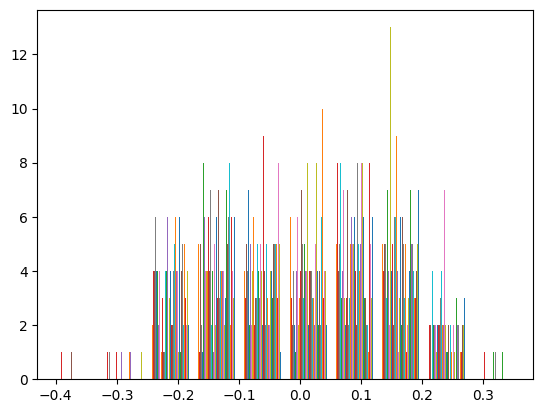

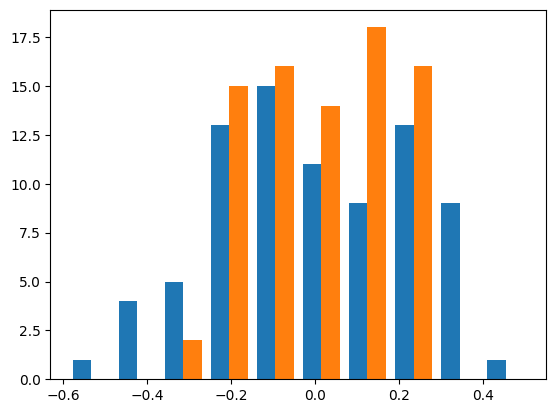

In [92]:
input, target, lenght, old_mlp_target = get_data(data_path_2, 1000)
opt_model, opt_parameter = load_pickled_model(input, target)

In [93]:
pickle.dump(opt_model, open(f"{PATH}pickled_data/trained_opt_model_{opt_parameter}", "wb"))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........activation
............vars
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-13 10:41:56         1801
variables.h5                                   2023-02-13 10:41:56        39032
metadata.json                                  2023-02-13 10:41:56           64


In [94]:
input, target, lenght, old_mlp_target = get_data(data_path_1, DATA_COUNT)

In [95]:
input.head()

,SL0-relID,SL0-driftT,SL0-alpha,SL1-relID,SL1-driftT,SL1-alpha,SL2-relID,SL2-driftT,SL2-alpha,SL3-relID,...,SL5-alpha,SL6-relID,SL6-driftT,SL6-alpha,SL7-relID,SL7-driftT,SL7-alpha,SL8-relID,SL8-driftT,SL8-alpha
20,-0.085938,0.045893,-0.203498,-0.710938,0.072375,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.100306,-0.308594,0.199289,0.187230,-0.160156,0.227568,-0.064716,0.18750,0.255591,0.000553
20,-0.445312,0.011464,0.455905,-0.007812,0.016172,-0.123483,0.003906,0.022139,-0.795990,0.140625,...,0.606477,-0.363281,0.046269,-0.514094,-0.343750,0.053436,0.000000,0.00000,0.000000,-0.000229
20,-0.445312,0.011464,0.455905,-0.007812,0.016172,-0.123483,0.003906,0.022139,-0.795990,0.140625,...,0.606477,-0.363281,0.046269,-0.514094,-0.343750,0.053436,0.000000,0.00000,0.000000,-0.000229
20,0.000000,0.032118,0.702225,-0.007812,0.045335,-0.001489,0.250000,0.062129,-0.608568,-1.000000,...,0.414544,0.000000,0.130858,-0.454711,0.210938,0.148711,0.300891,0.03125,0.166108,-0.063200
20,0.000000,0.032118,0.702225,-0.007812,0.045335,-0.001489,0.250000,0.062129,-0.608568,-1.000000,...,0.414544,0.000000,0.130858,-0.454711,0.210938,0.148711,0.300891,0.03125,0.166108,-0.063200


In [96]:
target.head()

,RecoZ,RecoTheta
20,-0.527575,0
20,0.418162,0
20,0.418162,0
20,0.333813,0
20,0.333813,0


In [97]:
old_mlp_target.head()

,RawZ,RawTheta
20,0,1.178100
20,0,0.903208
20,0,0.903208
20,0,4.771290
20,0,4.771290


In [98]:
def data_prep(model, input, target, old_mlp_target):
    print("Evaluate the model:")
    #results = model.evaluate(input.values, target.values, batch_size=128)
    #print("evaluation loss, evaluation acc:", results, "\n")
    
    print("Predict target and compare with true label:")
    y_pred = model.predict(input)

    z_list = np.array([])
    theta_list = np.array([])

    real_z_list = np.array([])
    real_theta_list = np.array([])

    old_z_list = np.array([])
    old_theta_list = np.array([])


    for element in y_pred:
        z_list = np.append(z_list, element[0]) 
        theta_list = np.append(theta_list, element[1])

    for element in target.values:
        real_z_list = np.append(real_z_list, element[0]) 
        real_theta_list = np.append(real_theta_list, element[1])
    
    for element in old_mlp_target.values:
        old_z_list = np.append(old_z_list, element[0]) 
        old_theta_list = np.append(old_theta_list, element[1])

    return z_list, real_z_list, old_z_list

In [99]:
index = 1
for model in model_list:
    print (f"accuracy for model expert {index}: {model.evaluate(input, target)[1]:0.03f}")    
    index = index + 1

print (f"accuracy for optimized model: {opt_model.evaluate(input, target)[1]:0.03f}")

1966/3125 [=================>............] - ETA: 1s - loss: 0.3862 - accuracy: 0.5118

Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 935us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 881us/step


/tmp/ipykernel_3142/46655444.py:27: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[i].legend(loc = 'upper left')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 2s 949us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 921us/step


/tmp/ipykernel_3142/46655444.py:27: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[i].legend(loc = 'upper left')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 896us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 2s 983us/step


/tmp/ipykernel_3142/46655444.py:27: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[i].legend(loc = 'upper left')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


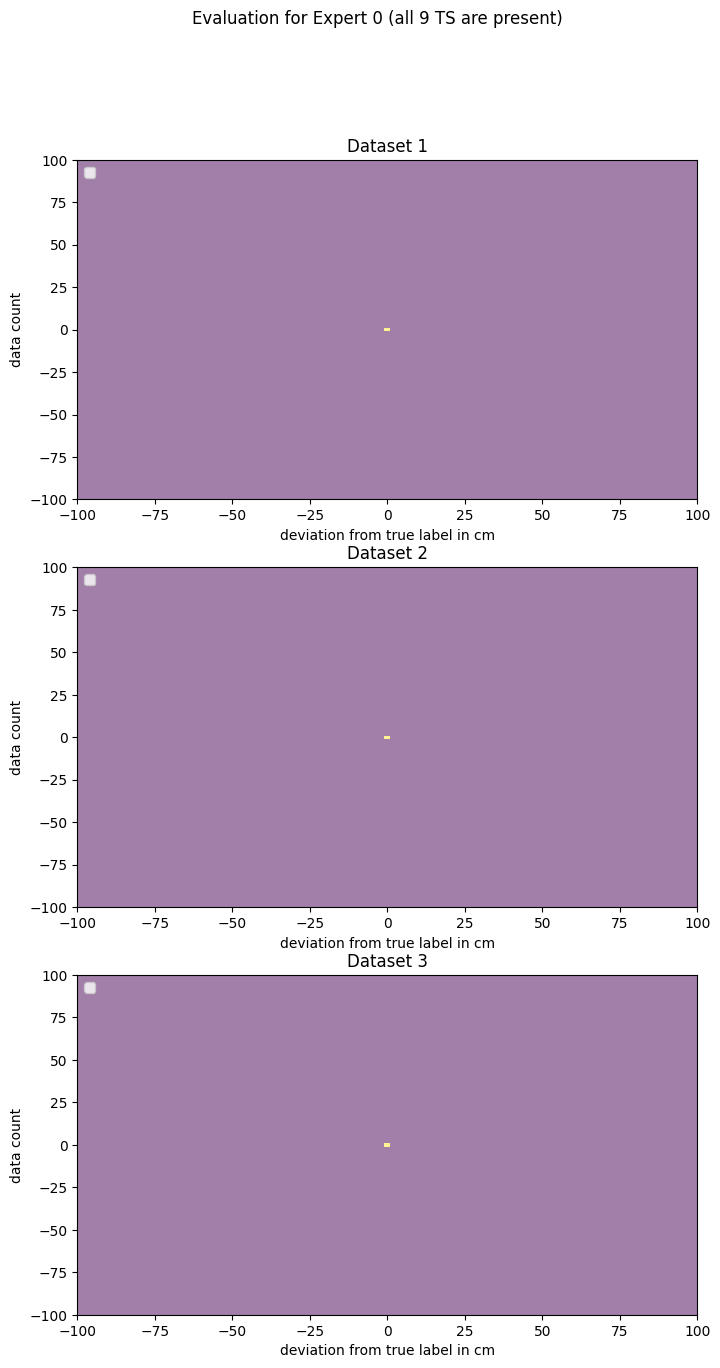

Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 856us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 948us/step


/tmp/ipykernel_3142/46655444.py:27: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[i].legend(loc = 'upper left')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 920us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 2s 1ms/step


KeyboardInterrupt: 

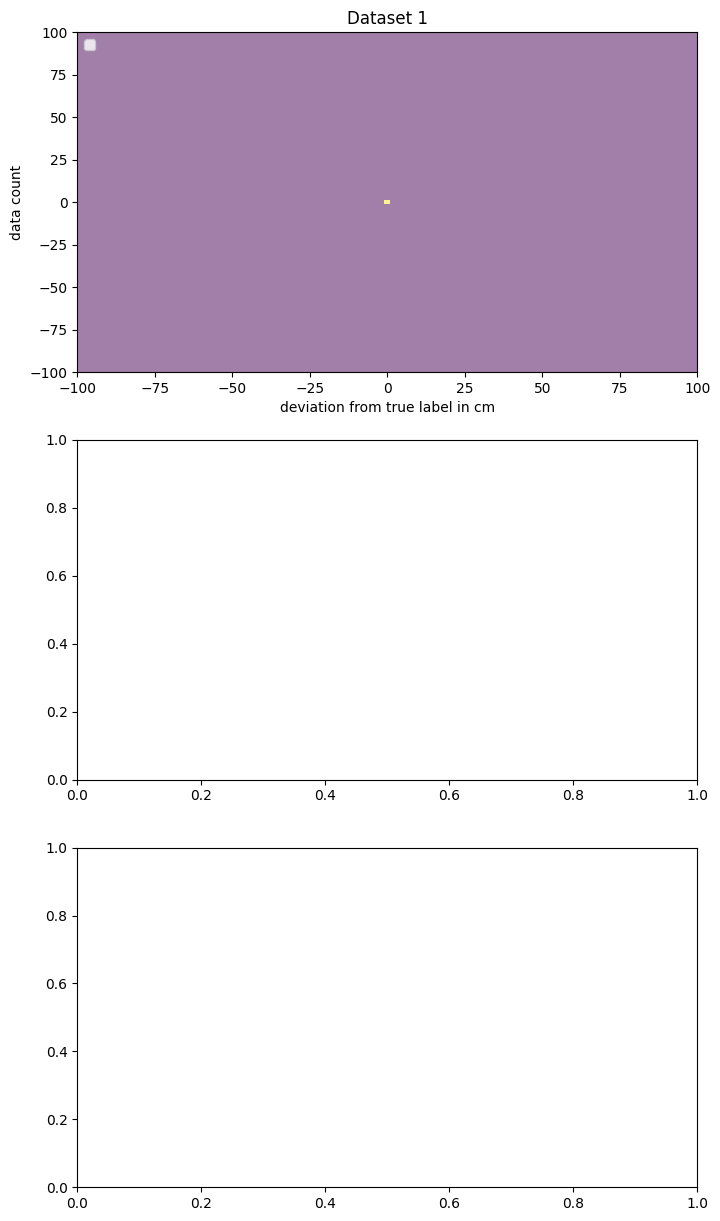

In [ ]:
def plot_z_deviation(model,title, save_name):
    hist_bins = np.linspace(-100, 100, 100)
    fig, ax = plt.subplots(3, 1)
    fig.set_size_inches(8, 15)
    i = 0
    for data_path in path_list:
        input, target, lenght, old_mlp_target = get_data(data_path, DATA_COUNT)
        z_list, real_z_list, old_z_list = data_prep(model, input, target, old_mlp_target)
        opt_list, real_z_list, old_z_list = data_prep(opt_model, input, target, old_mlp_target)

        z_difference_1 = (old_z_list).astype(float) - (real_z_list).astype(float)
        z_difference_2 = (opt_list).astype(float) - (real_z_list).astype(float)
        z_difference_3 = (z_list).astype(float) - (real_z_list).astype(float)

        ax[i].set_title(f'Dataset {i + 1}')
        ax[i].set_xlabel("deviation from true label in cm")
        ax[i].set_ylabel("data count")

        ax[i].hist2d(real_z_list, z_list, hist_bins, density=False, alpha=0.5, label='old target')
        #ax[i].hist2d(opt_list, real_z_list, density = False, alpha=0.5, label='[81] MLP architecture')
        #ax[i].hist2d(z_list, real_z_list, density = False, alpha=0.5, label='read in model')

        #ax[i].hist(z_difference_1, hist_bins, density = False, alpha=0.5, label='old target')
        #ax[i].hist(z_difference_2, hist_bins, density = False, alpha=0.5, label='[81] MLP architecture')
        #ax[i].hist(z_difference_3, hist_bins, density = False, alpha=0.5, label='read in model')
        
        ax[i].legend(loc = 'upper left')
        i = i + 1

    fig.suptitle(title)
    fig.savefig(f"{PATH}/plots/{save_name}.png")
    plt.show()

plot_z_deviation(model_1, 'Evaluation for Expert 0 (all 9 TS are present)',  "new_model1_z_diff" )
plot_z_deviation(model_2, 'Evaluation for Expert 1 (outer Most SLL TS from SSL 4 missing)',  "new_model2_z_diff" )
plot_z_deviation(model_3, 'Evaluation for Expert 2 (TS from SSL 3 missing)',  "new_model3_z_diff" )
plot_z_deviation(model_4, 'Evaluation for Expert 3 (TS form SLL2 missing)',  "new_model4_z_diff" )
plot_z_deviation(model_5, 'Evaluation for Expert 4 (inner Most SSL RS from SSL 1 missing)',  "new_model5_z_diff" )


Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 643us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 642us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 627us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 619us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 604us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 568us/step


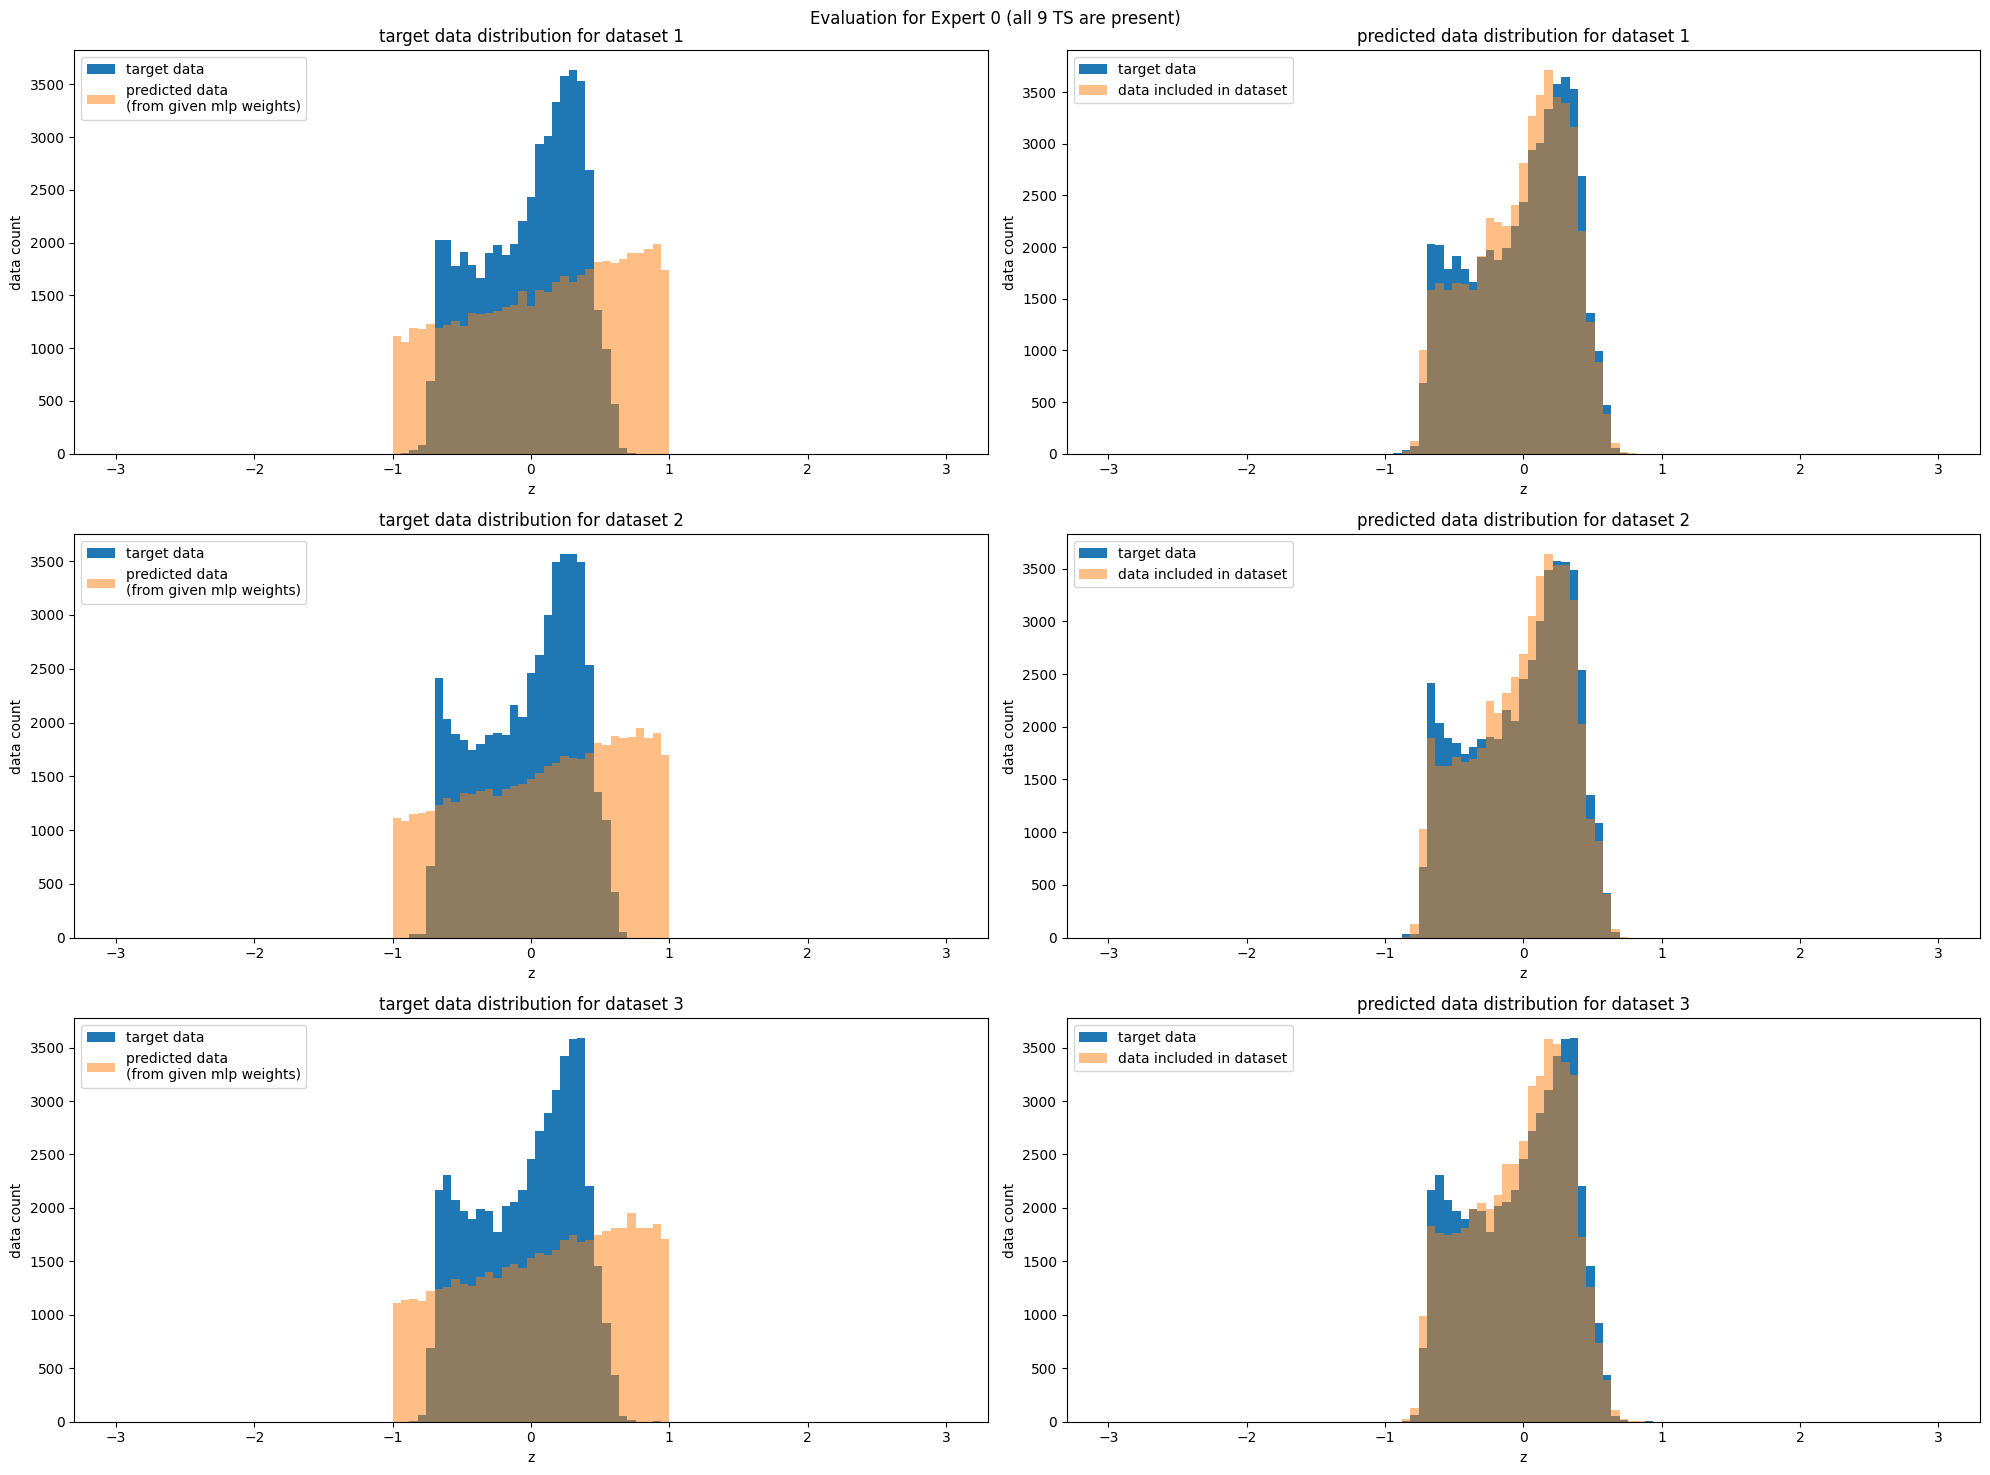

Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 581us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 587us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 596us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 605us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 614us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 591us/step


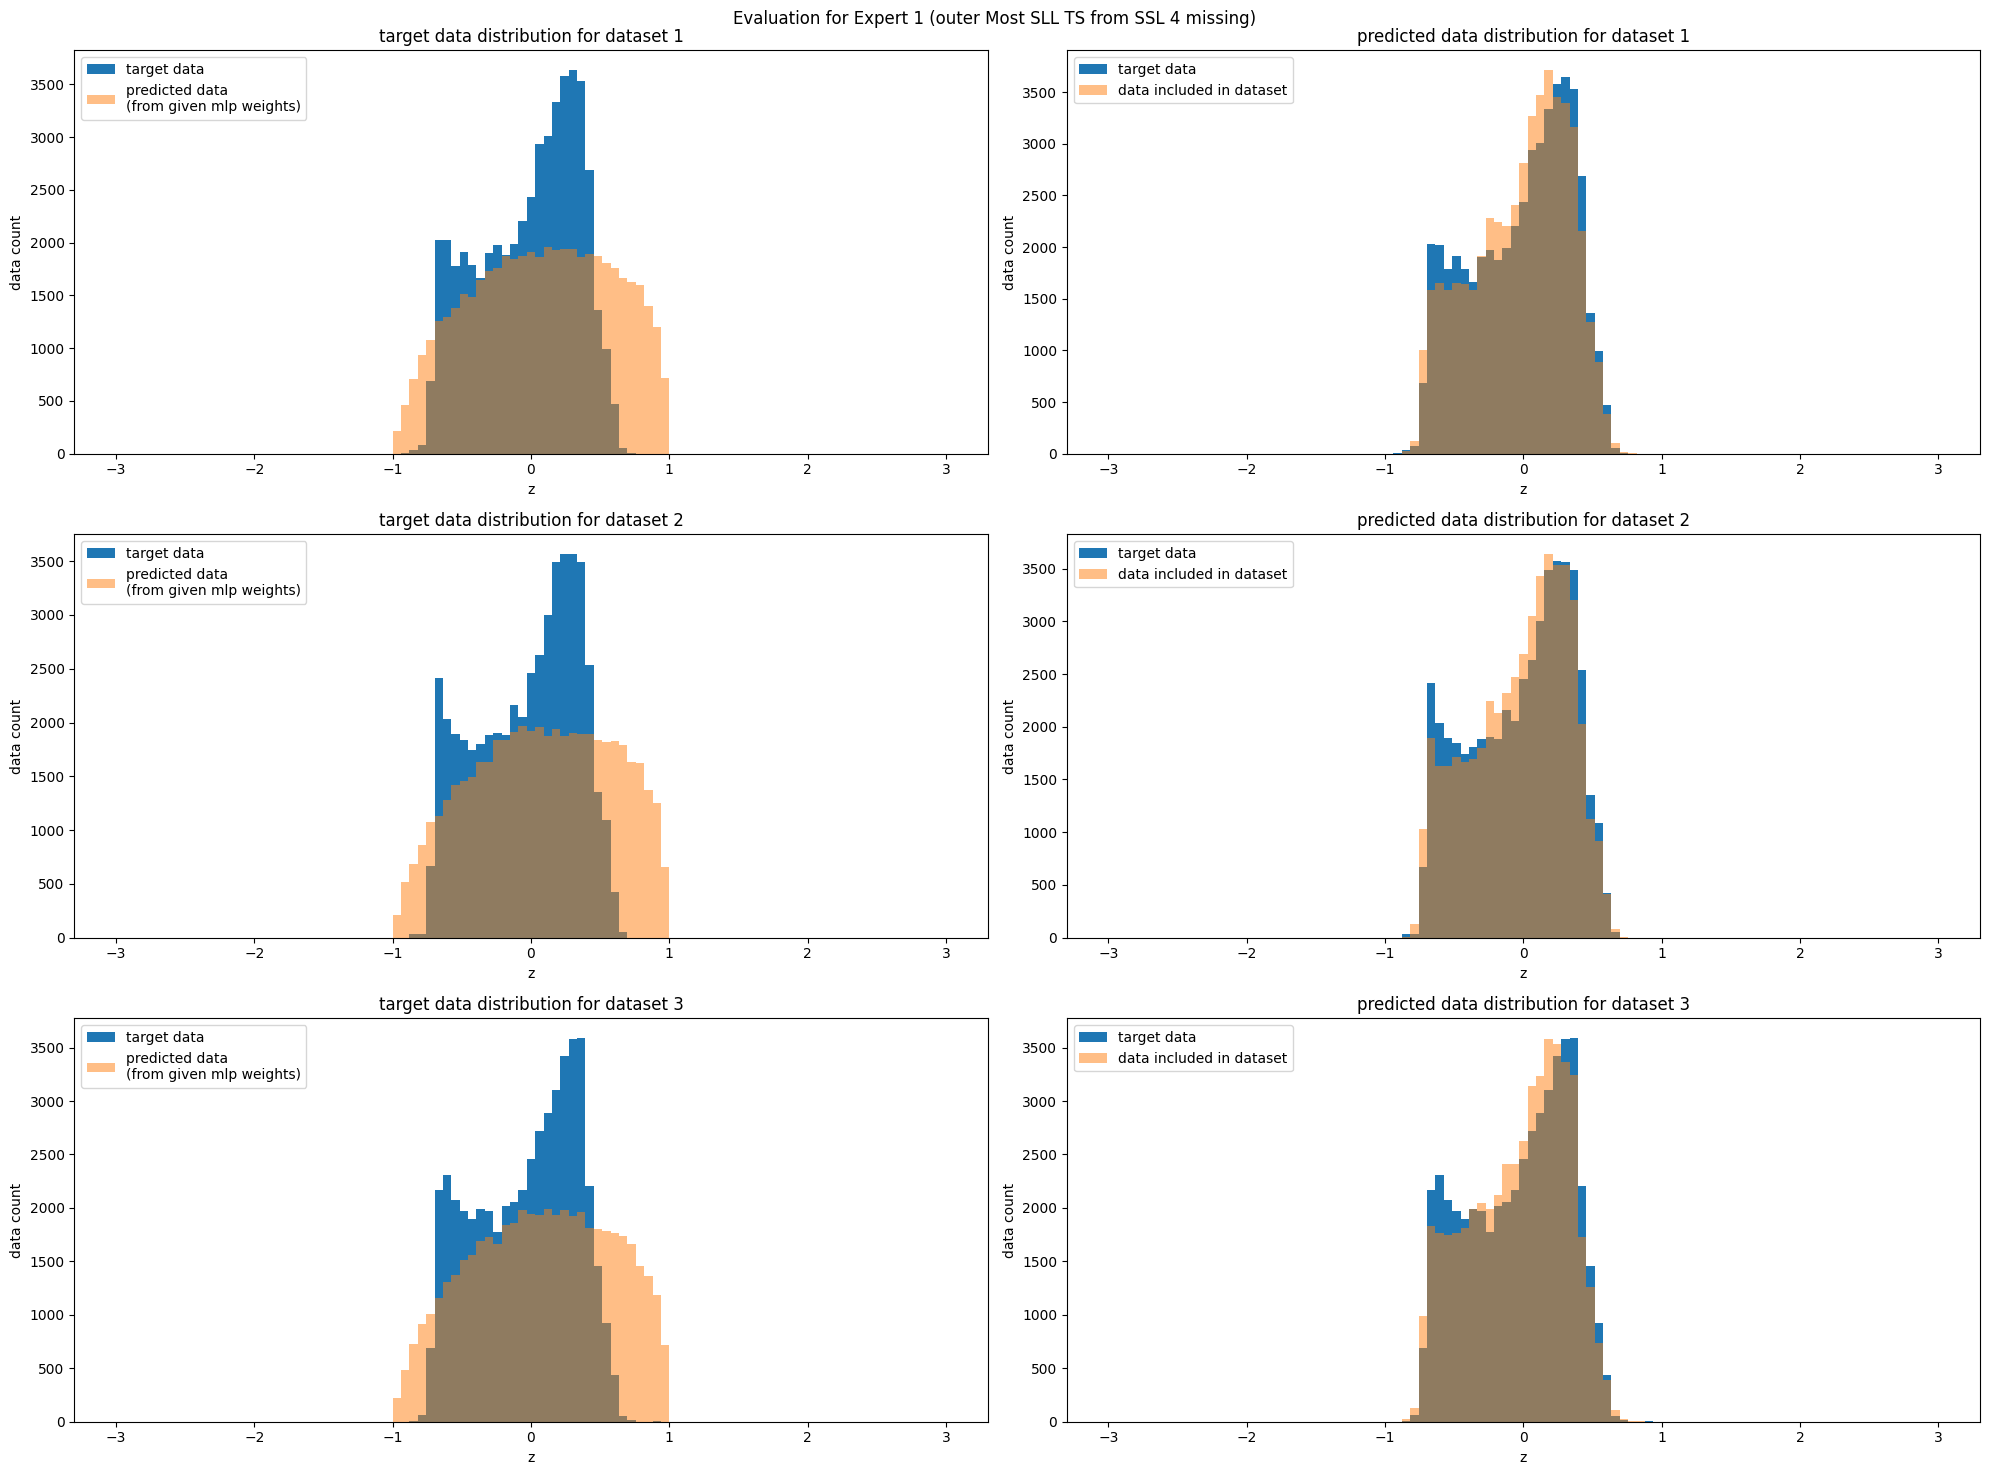

Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 616us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 581us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 597us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 588us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 567us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 587us/step


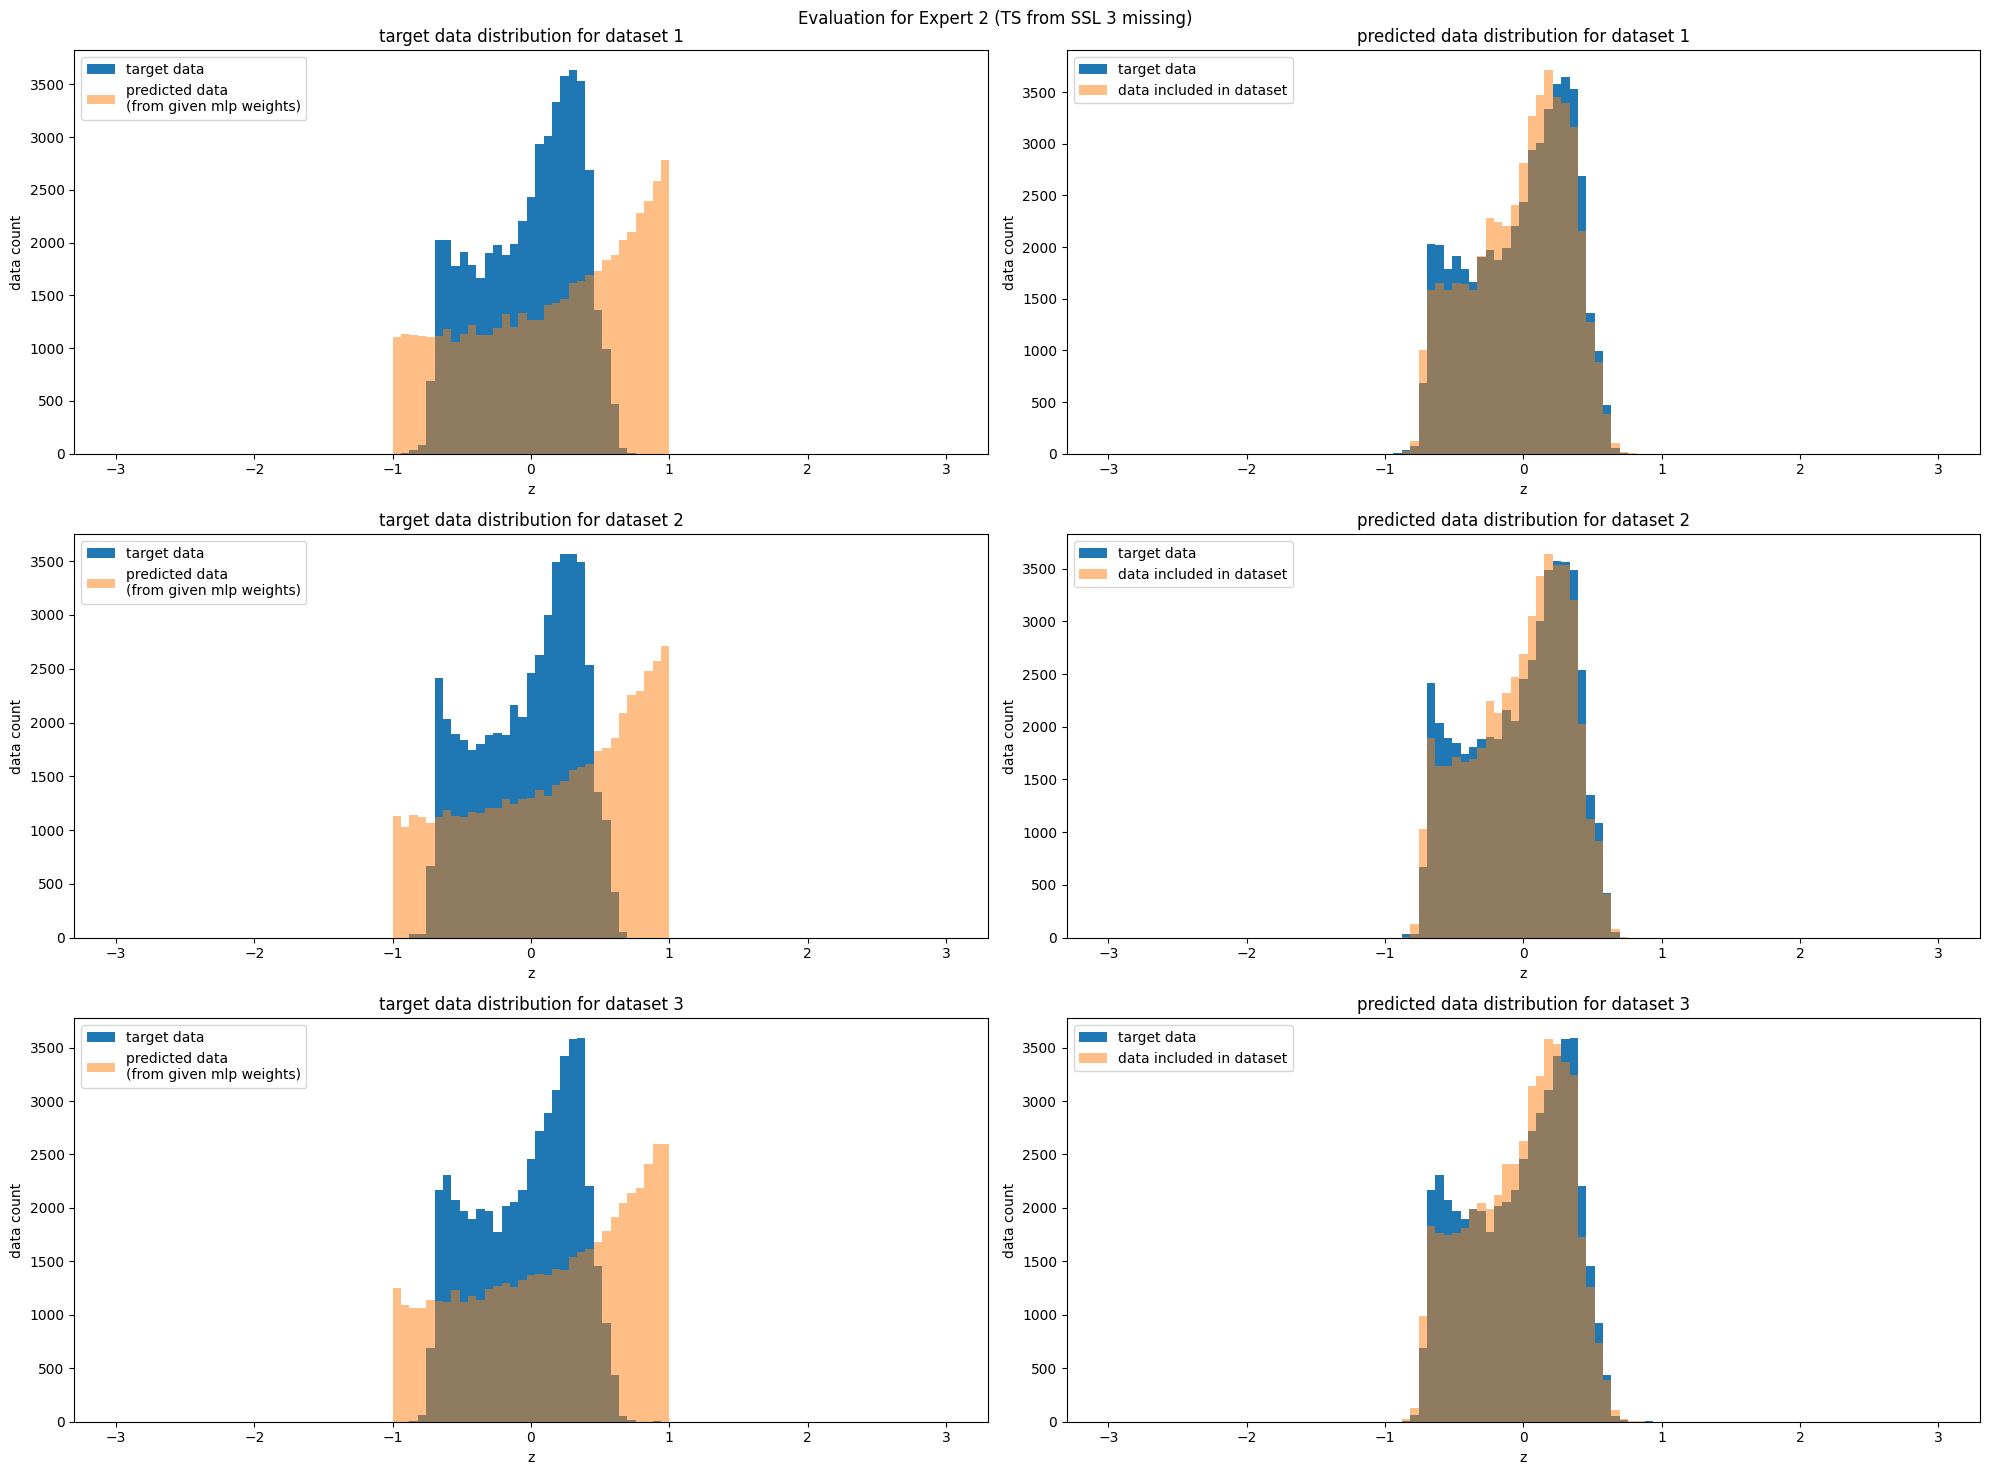

Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 668us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 646us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 601us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 647us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 704us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 592us/step


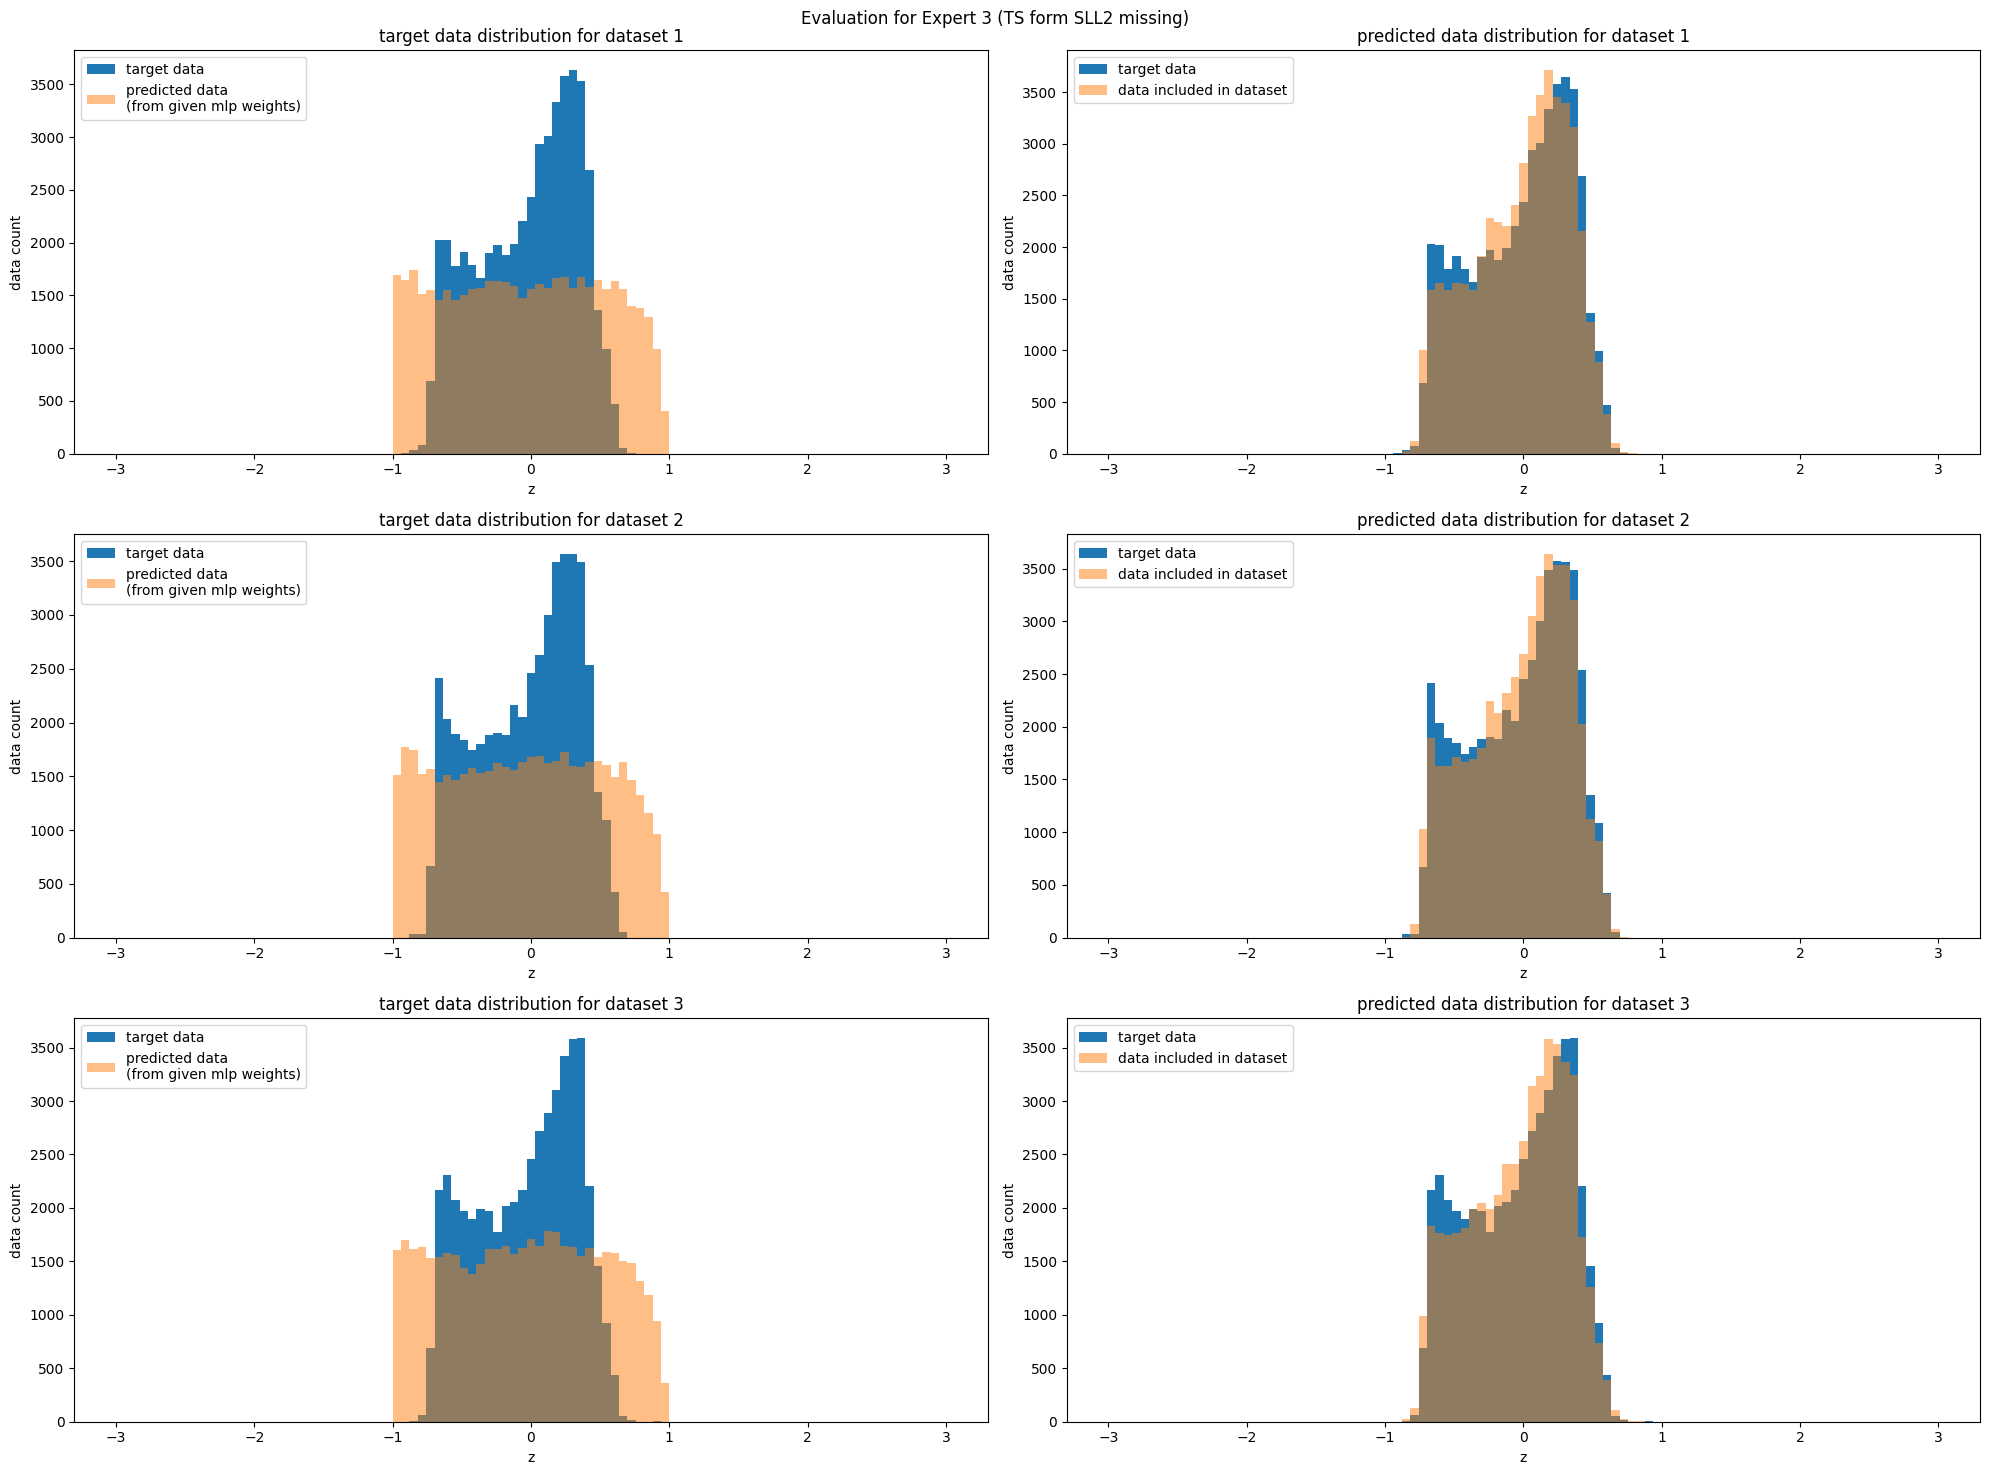

Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 655us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 617us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 569us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 605us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 602us/step
Evaluate the model:
Predict target and compare with true label:
1563/1563 [==============================] - 1s 595us/step


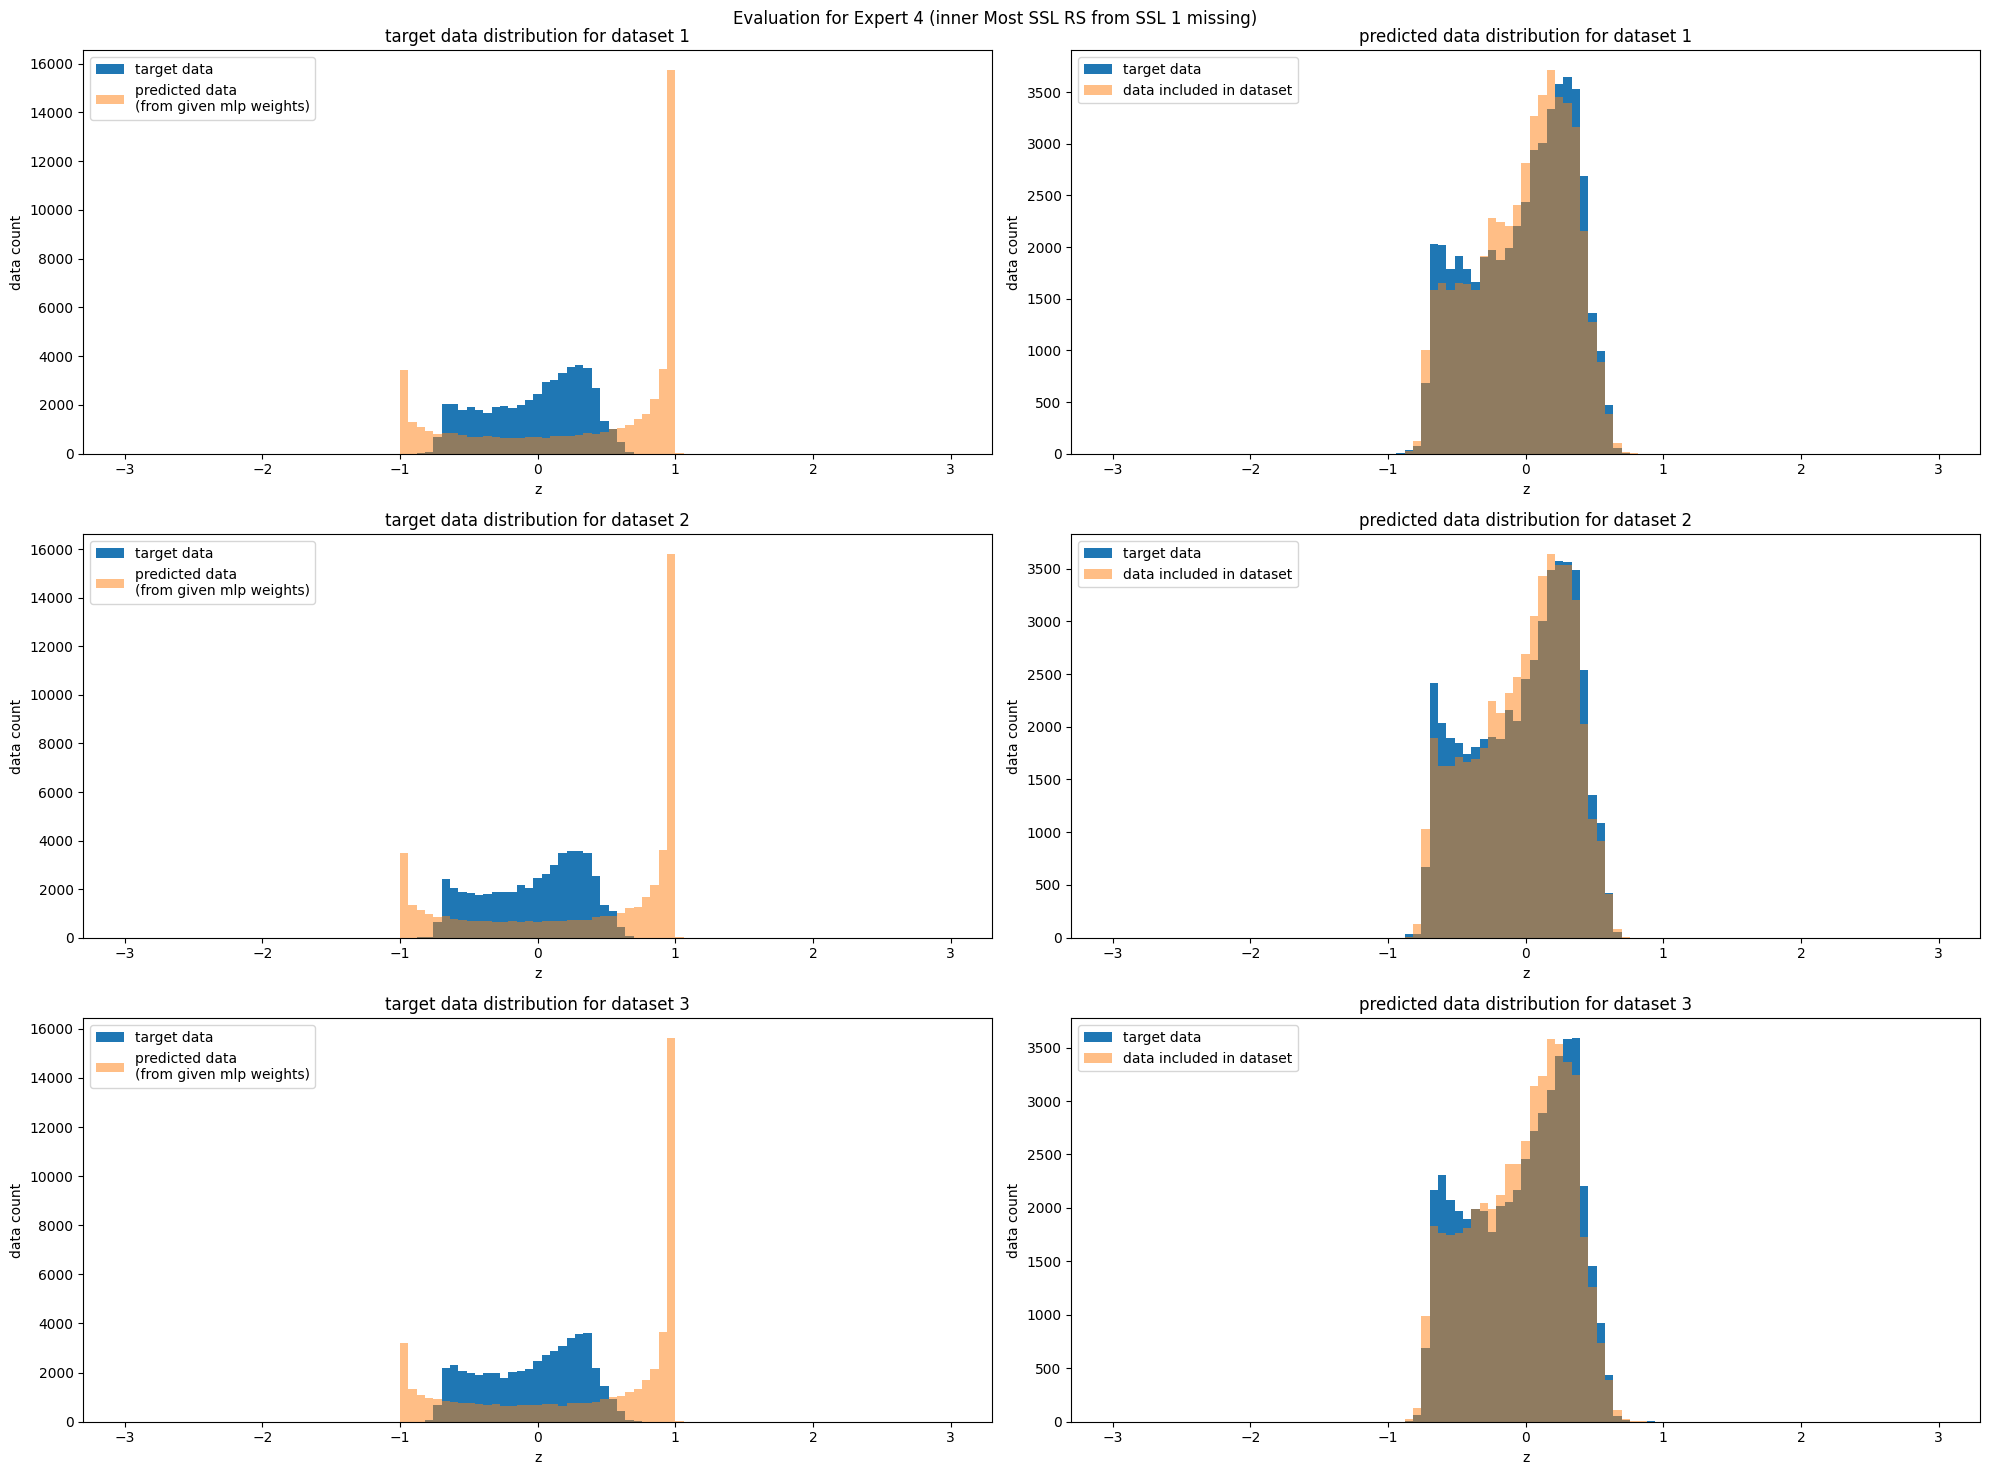

In [ ]:
def get_hist(model, title, save_name):

    hist_bins = np.linspace(-3, 3, 100)
    fig, ax = plt.subplots(3, 2)
    fig.set_size_inches(20, 15)
    i = 0
    for data_path in path_list:
        input, target, lenght, old_mlp_target = get_data(data_path, DATA_COUNT)
        z_list, real_z_list, old_z_list = data_prep(model, input, target, old_mlp_target)
        opt_list, real_z_list, old_z_list = data_prep(opt_model, input, target, old_mlp_target)

        ax[i, 0].set_title(f'target data distribution for dataset {i + 1}')
        ax[i, 0].set_xlabel("z")
        ax[i, 0].set_ylabel("data count")

        ax[i, 1].set_title(f'predicted data distribution for dataset {i + 1}')
        ax[i, 1].set_xlabel("z")
        ax[i, 1].set_ylabel("data count")
        
        n1, bins1, patches1 = ax[i, 0].hist(real_z_list, hist_bins, density=False, alpha = 1, label = 'target data')
        n2, bins2, patches2 = ax[i, 0].hist(z_list, hist_bins, density=False, range=(-10, 10), alpha=0.5, label='predicted data \n(from given mlp weights)')
        
        n1, bins1, patches1 = ax[i, 1].hist(real_z_list, hist_bins, density=False, alpha = 1, label = 'target data')
        n3, bins3, patches3 = ax[i, 1].hist(opt_list, hist_bins, density=False, range=(-10, 10), alpha=0.5, label='data included in dataset')
        ax[i, 1].legend(loc = 'upper left')
        ax[i, 0].legend(loc = 'upper left')
        i = i + 1
    
    fig.suptitle(title)
    plt.tight_layout()
    fig.savefig(f"{PATH}/plots/{save_name}.png")
    plt.show()


get_hist(model_1, 'Evaluation for Expert 0 (all 9 TS are present)',  "new_model1_z_hist" )
get_hist(model_2, 'Evaluation for Expert 1 (outer Most SLL TS from SSL 4 missing)',  "new_model2_z_hist" )
get_hist(model_3, 'Evaluation for Expert 2 (TS from SSL 3 missing)',  "new_model3_z_hist" )
get_hist(model_4, 'Evaluation for Expert 3 (TS form SLL2 missing)',  "new_model4_z_hist" )
get_hist(model_5, 'Evaluation for Expert 4 (inner Most SSL RS from SSL 1 missing)',  "new_model5_z_hist" )